# 딥러닝 프레임워크란?
- 딥러닝을 개발하기 위한 여러 라이브러리나 모듈 등을 쉽게 사용할 수 있도록 하나로 묶어 놓은 패키지
- 씨아노(Theano), 카페(Caffe), 케라스(Keras), 텐서플로(Tensorflow), 파이토치(PyTorch) 등
- 케라스는 파이썬으로 작성된 고수준 프레임워크로, 엔진으로 텐서플로를 사용한다.
- 텐서플로는 구글에서 개발한 파이썬 기반 프레임워크로 머신러닝 개발자에게 가장 인기 있는 프레임워크 중 하나이다. 2019년 텐서플로 2.0이 출시되면서 포괄적인 오픈소스 머신러닝 플랫폼 이용이 가능해졌으며, 고수준 프레임워크인 케라스와 저수준 프레임워크인 텐서플로 코어 API를 함께 사용할 수 있다.

## 케라스의 특징
- https://keras/io
- 케라스는 계산을 직접 수행하는 내부 레벨의 라이브러리가 아니라, 개발자가 손쉽게 딥러닝을 구현할 수 있도록 도와주는 상위 레벨의 인터페이스이다.
- 즉, 케라스는 텐서 조작이나 미분 같은 저수준의 연산은 다루지 않고, 백엔드 엔진에서 제공하는 최적화되고 특화된 텐서 라이브러리를 사용한다.
- 케라스의 가장 핵심적인 데이터 구조는 모델이다.
- 케라스에서 제공하는 시퀀스 모델로 원하는 층을 쉽게 차례로 쌓을 수 있다.

In [1]:
import keras
keras.__version__

'2.5.0'

### 케라스에서 MNIST 데이터셋 적재하기
- 이미지는 넘파이 배열로 인코딩되어 있고 레이블은 0부터 9까지의 숫자 배열이다.
- 이미지와 레이블은 1대1 관계이다.

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 훈련 데이터 살펴보기

In [3]:
train_images.ndim

3

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
len(train_labels)

60000

- 이 배열은 8비트 정수형 3D 텐서이다.
- 28*28 크기의 정수 행렬 60000개가 있는 배열이다.
- 각 행렬은 하나의 흑백 이미지이고, 행렬의 각 원소는 0에서 255 사이의 값을 가진다.

### 다섯 번째 샘플(이미지) 살펴보기

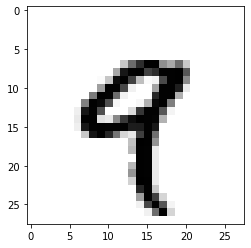

In [8]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 테스트 데이터 살펴보기

In [9]:
test_images.ndim

3

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_images.dtype

dtype('uint8')

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
len(test_labels)

10000

### 신경망 구조
- 훈련 데이터 train_images와 train_labels를 네트워크에 주입한다.
- 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습된다.
- test_images에 대한 예측을 네트워크에 요청한다.
- 예측이 test_labels와 맞는지 확인한다.
<br><br>
- 신경망의 핵심 구성 요소는 데이터 처리 모듈인 층(layer)이다.
- 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있다.
- 딥러닝 모델은 데이터 정제 필터(층)이 연속되어 있는 데이터 처리를 위한 여과기와 같다.

In [14]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

- 여기서는 완전 연결 층인 Dense 층 2개가 연속되어 있다.
- 두 번째 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1)을 반환하는 소프트맥스(softmax) 층이다.
- 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률이다.

### 컴파일 단계
- 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와준다.
- 옵티마이저 : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘이다.
- 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려한다.

In [15]:
network.compile(optimizer='rmsprop',  # ㄱㅕㅇㅅㅏ ㅎㅏㄱㅏㅇㅂㅓㅂ
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### 이미지 데이터 준비하기
- 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정한다.
- [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있다.
- 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28*28) 크기인 배열로 바꾼다.

In [16]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

### 레이블 준비하기
- 레이블을 범주형으로 인코딩한다.

In [17]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 모델 학습

In [18]:
network.fit(train_images, train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 13s 5ms/step - loss: 0.4241 - accuracy: 0.8786
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1115 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0677 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0359 - accuracy: 0.9892


- 네트워크가 128개 샘플씩 미니 배치로 훈련 데이터를 다섯 번 반복한다.
- 전체 훈련 데이터에 수행되는 각 반복을 에포크(epoch)라고 한다.
- 각 반복마다 네트워크가 배치에서 손실에 대한 가중치의 그래디언트를 계산하고 그에 맞추어 가중치를 업데이트한다.
- 다섯 번의 에포크 동안 네트워크는 2345번의 그래이던트 업데이트를 수행한다.(에포크마다 469번, 훈련 샘플이 6만 개이므로 128개씩 배치로 나누면 469개의 배치가 만들어진다.)

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 990us/step - loss: 0.0790 - accuracy: 0.9763


In [20]:
print('test_acc: ', test_acc)

test_acc:  0.9763000011444092


In [ ]:
`